In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
train_df = pd.read_csv('data-v5/train/train.csv')
test_df = pd.read_csv('data-v5/test/test.csv')
valid_df = pd.read_csv('data-v5/valid/valid.csv')

# Add a column to indicate the source of each data
train_df['dataset'] = 'train'
test_df['dataset'] = 'test'
valid_df['dataset'] = 'valid'

# Combine the datasets
combined_df = pd.concat([train_df, test_df, valid_df], ignore_index=True)
print(combined_df)
# Identify rows with NaN in "Bags used"
combined_df['NaN_Bags_used'] = combined_df['Bags used'].isna()

# Plot the count of NaN values in each dataset
plt.figure(figsize=(10, 6))
sns.countplot(x='dataset', data=combined_df[combined_df['NaN_Bags_used']])
plt.title('Count of NaN Values in "Bags used" Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Count of NaNs')
plt.show()


     pothole_id  stick_area  pothole_area  conversion_factor  \
0          1008     12772.0      265080.0           0.156593   
1          1009     21150.0       46222.0           0.094563   
2           101      9690.0      181656.0           0.206398   
3          1018     17820.0      240006.0           0.112233   
4          1019     50400.0      214812.0           0.039683   
..          ...         ...           ...                ...   
455         990     13464.0      301286.0           0.148544   
456         991     20340.0      204525.0           0.098328   
457         992     38456.0      681634.0           0.052007   
458         993      9352.0      308175.0           0.213858   
459         996     42600.0      221386.0           0.046948   

     pothole_area_mm2  Bags used _x  Bags used _y dataset  
0        41509.552145           NaN          0.50   train  
1         4370.874704           NaN          0.25   train  
2        37493.498452           0.5           NaN  

KeyError: 'Bags used'

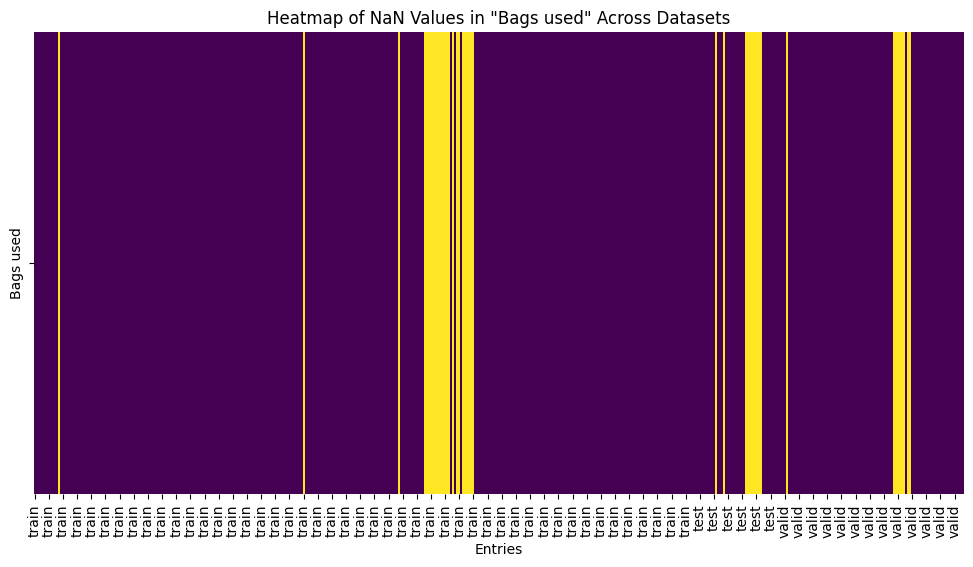

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
train_df = pd.read_csv('data-v5/train/train.csv')
test_df = pd.read_csv('data-v5/test/test.csv')
valid_df = pd.read_csv('data-v5/valid/valid.csv')


# Add a column to indicate the source of each data
train_df['dataset'] = 'train'
test_df['dataset'] = 'test'
valid_df['dataset'] = 'valid'

# Combine the datasets
combined_df = pd.concat([train_df, test_df, valid_df], ignore_index=True)

# Set the index to 'dataset' to plot against it
combined_df.set_index('dataset', inplace=True)

# Create a boolean DataFrame where True represents NaN in 'Bags used'
nan_map = combined_df[['Bags used']].isnull()

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(nan_map.T, cbar=False, cmap='viridis')
plt.title('Heatmap of NaN Values in "Bags used" Across Datasets')
plt.xlabel('Entries')
plt.show()
